In [11]:
import pandas as pd
df = pd.read_csv("AAPL_clean.csv")
df.columns = df.columns.str.strip().str.lower()

df['volume_prev'] = df['volume'].shift(1)
df['volatility_prev'] = df['volatility'].shift(1)
df['volume_delta'] = df['volume'] - df['volume_prev']
df['volatility_delta'] = df['volatility'] - df['volatility_prev']

df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df.head()


,date,open,high,low,close,adj close,volume,volatility,volume_prev,volatility_prev,volume_delta,volatility_delta
1,2020-12-07,122.31,124.57,122.25,123.75,120.46,86712000.0,0.018747,78260400.0,0.010961,8451600.0,0.007786
2,2020-12-08,124.37,124.98,123.09,124.38,121.08,82225500.0,0.015195,86712000.0,0.018747,-4486500.0,-0.003552
3,2020-12-09,124.53,125.95,121.00,121.78,118.55,115089200.0,0.040647,82225500.0,0.015195,32863700.0,0.025452
4,2020-12-10,120.50,123.87,120.15,123.24,119.97,81312200.0,0.030185,115089200.0,0.040647,-33777000.0,-0.010462
5,2020-12-11,122.43,122.76,120.55,122.41,119.16,86939800.0,0.018054,81312200.0,0.030185,5627600.0,-0.012131


In [8]:
df['volume_delta'] = df['volume'] - df['volume_prev']
df['volatility_delta'] = df['volatility'] - df['volatility_prev']


In [2]:
# Prepare feature (X) and target (y)
volume_changes = df['volume_delta'].values.reshape(-1, 1)
volatility_changes = df['volatility_delta'].values


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit linear model
linear_model = LinearRegression()
linear_model.fit(volume_changes, volatility_changes)

linear_predictions = linear_model.predict(volume_changes)

# R² score
linear_r2 = r2_score(volatility_changes, linear_predictions)

# Coefficients
slope = linear_model.coef_[0]
intercept = linear_model.intercept_

print("----- AAPL: LINEAR MODEL -----")
print(f"R² Score: {linear_r2:.4f} ({linear_r2*100:.2f}%)")
print(f"Equation: Δσ = {slope:.6e} × ΔV + {intercept:.6e}")


----- AAPL: LINEAR MODEL -----
R² Score: 0.2165 (21.65%)
Equation: Δσ = 1.913059e-10 × ΔV + 7.937587e-06


In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(volume_changes)

# Train polynomial model
poly_model = LinearRegression()
poly_model.fit(X_poly, volatility_changes)

poly_predictions = poly_model.predict(X_poly)

# Compute R²
r2_poly = r2_score(volatility_changes, poly_predictions)

print("\n----- AAPL: POLYNOMIAL MODEL (DEGREE 2) -----")
print(f"R² Score: {r2_poly:.4f} ({r2_poly*100:.2f}%)")



----- AAPL: POLYNOMIAL MODEL (DEGREE 2) -----
R² Score: 0.2165 (21.65%)


In [ ]:
print("\n----- AAPL: MODEL COMPARISON -----")
print(f"Linear Model R²:     {linear_r2:.4f}")
print(f"Polynomial Model R²: {r2_poly:.4f}")

improvement = r2_poly - linear_r2
print(f"\nImprovement: {improvement:.4f} ({improvement*100:.2f}%)")

if r2_poly > linear_r2:
    print(f"\nPolynomial model is better by {improvement*100:.2f}%")
else:
    print("\nLinear model is actually better for AAPL.")



----- AAPL: MODEL COMPARISON -----
Linear Model R²:     0.2165
Polynomial Model R²: 0.2165

Improvement: 0.0000 (0.00%)

Polynomial model is better by 0.00%


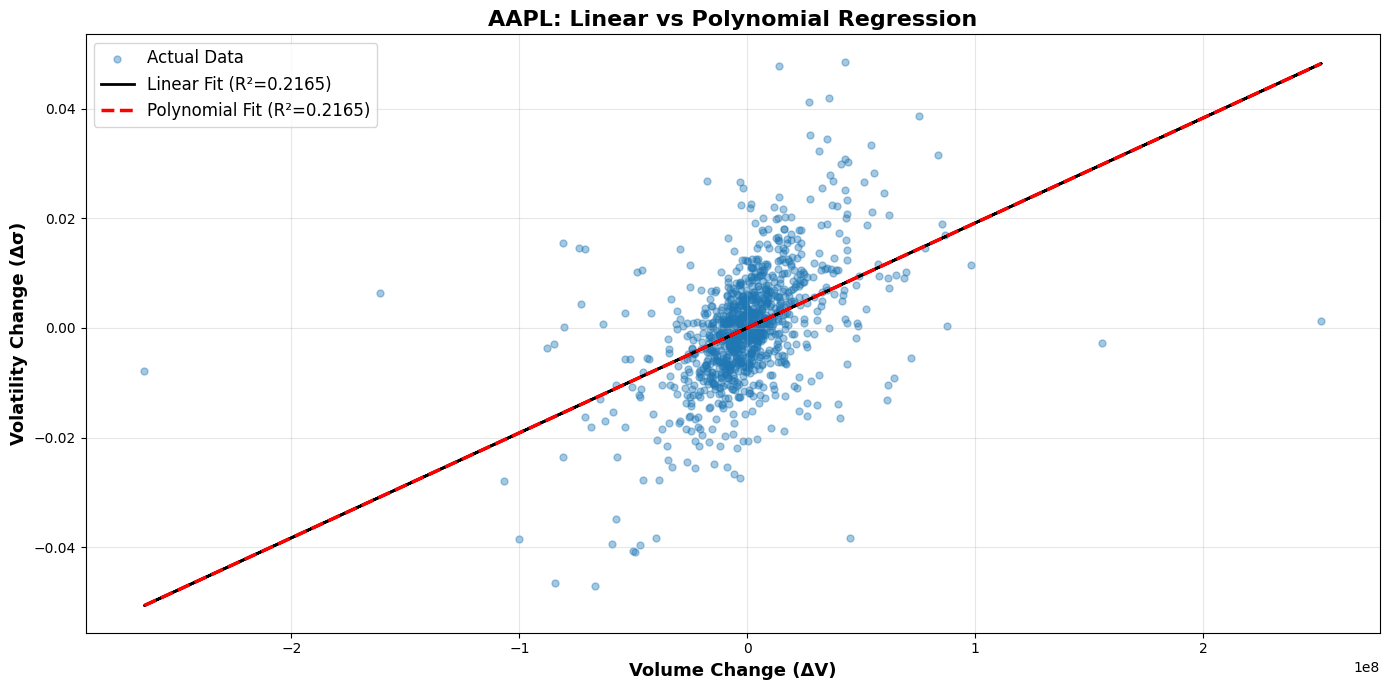

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 7))

# Scatter Plot
plt.scatter(
    volume_changes,
    volatility_changes,
    alpha=0.4, s=25,
    color='#1f77b4',
    label='Actual Data'
)

# Linear line
plt.plot(
    volume_changes,
    linear_predictions,
    color='black', linewidth=2,
    label=f'Linear Fit (R²={linear_r2:.4f})'
)

# Polynomial line
sorted_idx = np.argsort(volume_changes.flatten())
plt.plot(
    volume_changes[sorted_idx],
    poly_predictions[sorted_idx],
    color='red', linewidth=2.5, linestyle='--',
    label=f'Polynomial Fit (R²={r2_poly:.4f})'
)

plt.xlabel('Volume Change (ΔV)', fontsize=13, fontweight='bold')
plt.ylabel('Volatility Change (Δσ)', fontsize=13, fontweight='bold')
plt.title('AAPL: Linear vs Polynomial Regression', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
